# SVM classififcation

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv('Credit_risk.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
data.shape

(563, 13)

In [30]:
df=data.drop(['Gender','Education','Married'],axis=1)
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0.0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0.0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0.0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [32]:
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
df.isna().sum()

Loan_ID               0
Dependents           15
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df=df.fillna(method='bfill')
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0,6000,0.0,141.0,360.0,1.0,2,1


In [35]:
df.isna().sum()

Loan_ID              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

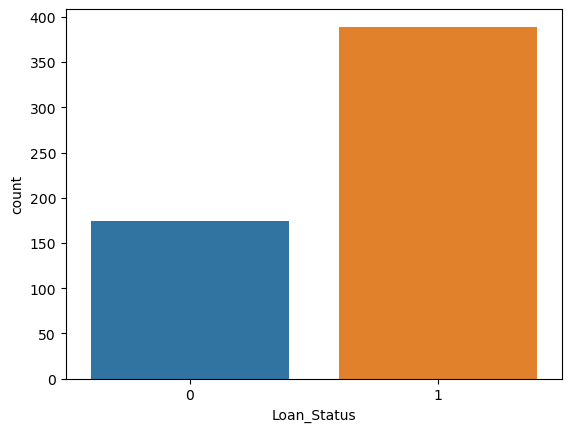

In [36]:
sns.countplot(x ='Loan_Status', data = df)

array([[<Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Loan_Status'}>]], dtype=object)

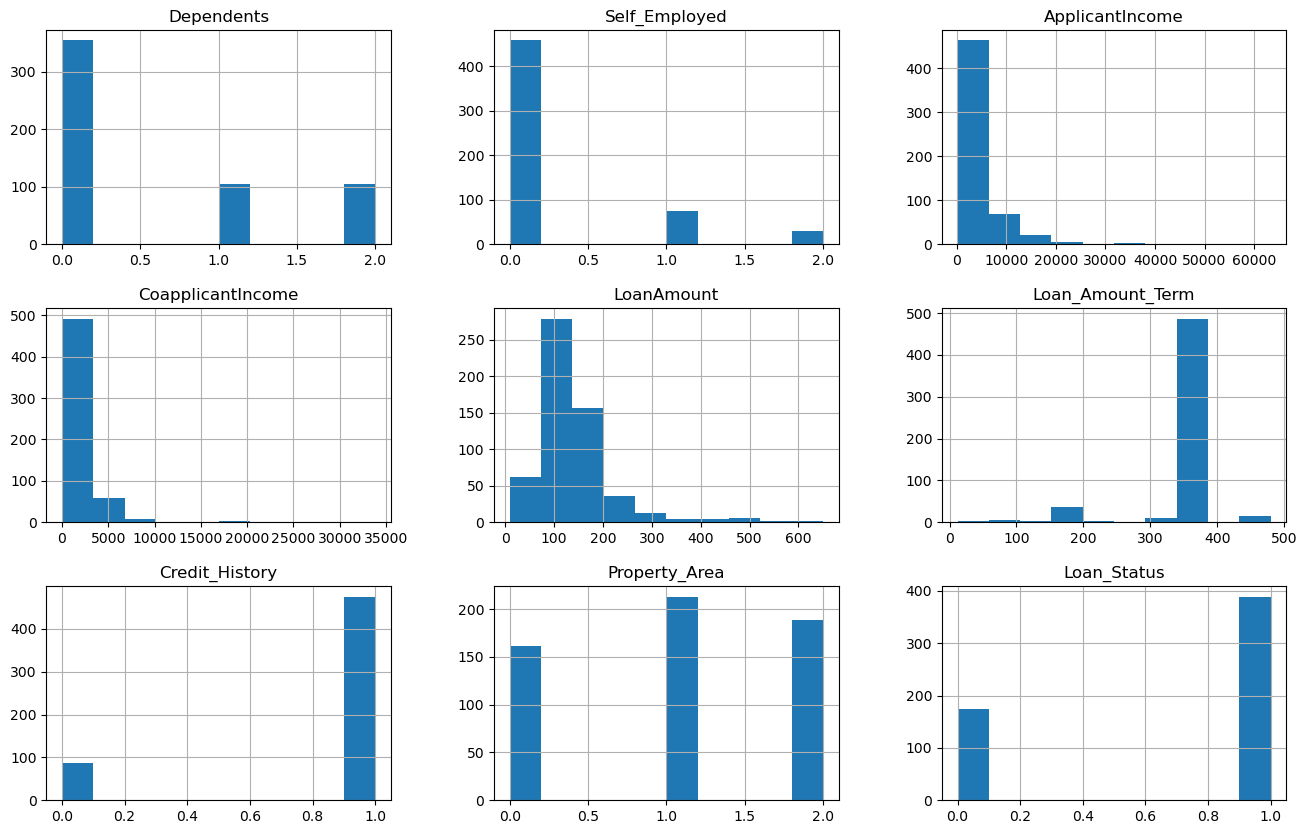

In [37]:
df.hist(figsize=(16,10))

<Axes: >

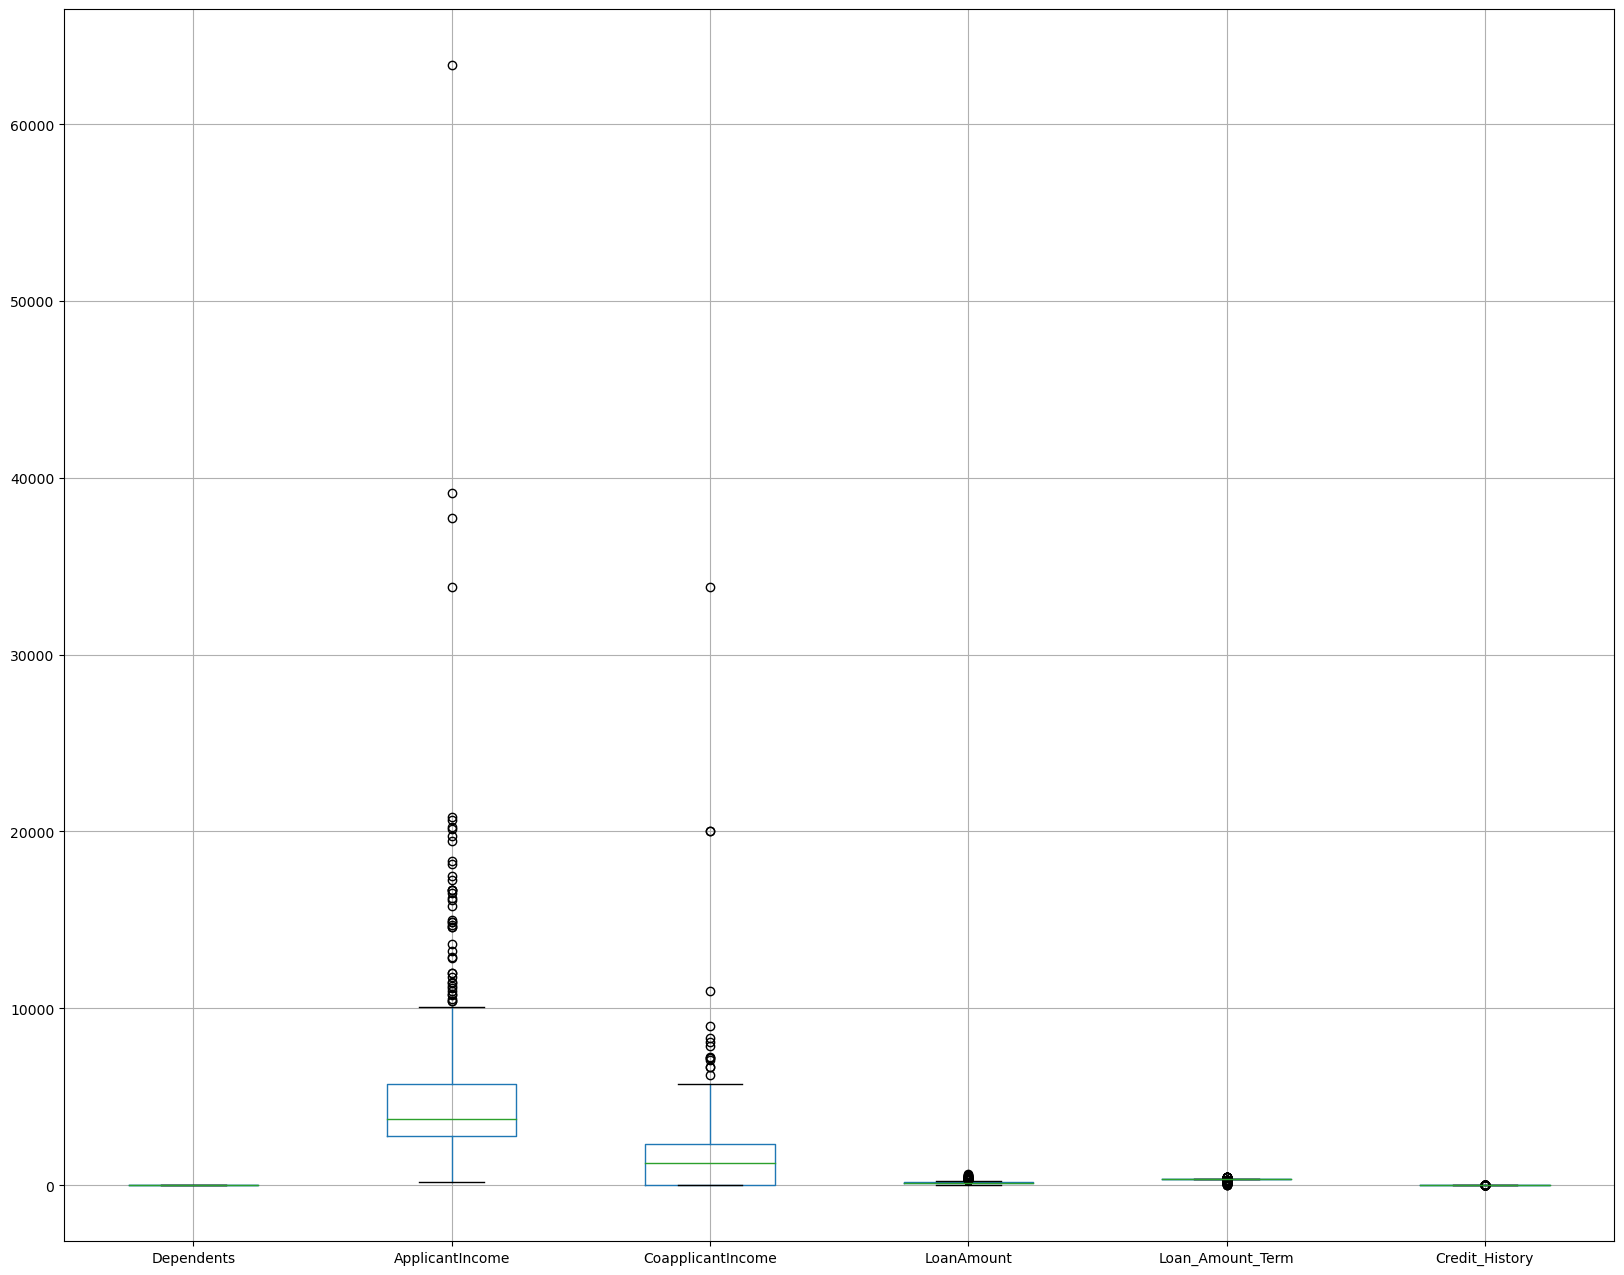

In [38]:
data.boxplot(figsize=(20,16))

In [39]:
df=df.drop('Loan_ID',axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0,6000,0.0,141.0,360.0,1.0,2,1


# Assign x & y

In [40]:
x=df.iloc[:,:-1].values
x

array([[0.000e+00, 0.000e+00, 5.849e+03, ..., 3.600e+02, 1.000e+00,
        2.000e+00],
       [1.000e+00, 0.000e+00, 4.583e+03, ..., 3.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 3.000e+03, ..., 3.600e+02, 1.000e+00,
        2.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 8.072e+03, ..., 3.600e+02, 1.000e+00,
        2.000e+00],
       [2.000e+00, 0.000e+00, 7.583e+03, ..., 3.600e+02, 1.000e+00,
        2.000e+00],
       [0.000e+00, 1.000e+00, 4.583e+03, ..., 3.600e+02, 0.000e+00,
        1.000e+00]])

In [41]:
y=df.iloc[:,-1:].values
y

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# Split The data

In [42]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(450, 8)

(450, 1)

(113, 8)

(113, 1)


# Build a SVM model with 'Linear'

In [43]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

print('Predicted class labels for the thest samples:\n',ypred)
print()
print('Accuray score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion matrics:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report:\n',classification_report(ytest,ypred))

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted class labels for the thest samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1]

Accuray score:	 0.7610619469026548
Confusion matrics:
 [[12 24]
 [ 3 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        36
           1       0.76      0.96      0.85        77

    accuracy                           0.76       113
   macro avg       0.78      0.65      0.66       113
weighted avg       0.77      0.76      0.73       113



# Build a SVM model with 'rbf'

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svc=SVC(kernel='rbf')
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

print('Predicted class labels for the thest samples:\n',ypred)
print()
print('Accuray score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion matrics:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report:\n',classification_report(ytest,ypred))

Predicted class labels for the thest samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Accuray score:	 0.672566371681416
Confusion matrics:
 [[ 0 36]
 [ 1 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.68      0.99      0.80        77

    accuracy                           0.67       113
   macro avg       0.34      0.49      0.40       113
weighted avg       0.46      0.67      0.55       113



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Build a SVM model with 'rbf' and balanced dataset

In [46]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',class_weight='balanced')
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

print('Predicted class labels for the thest samples:\n',ypred)
print()
print('Accuray score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion matrics:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report:\n',classification_report(ytest,ypred))

Predicted class labels for the thest samples:
 [1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 1 0]

Accuray score:	 0.5221238938053098
Confusion matrics:
 [[20 16]
 [38 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.56      0.43        36
           1       0.71      0.51      0.59        77

    accuracy                           0.52       113
   macro avg       0.53      0.53      0.51       113
weighted avg       0.59      0.52      0.54       113



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build a SVM model with 'Linear' and balanced dataset

In [47]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',class_weight='balanced')
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

print('Predicted class labels for the thest samples:\n',ypred)
print()
print('Accuray score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion matrics:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report:\n',classification_report(ytest,ypred))

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted class labels for the thest samples:
 [1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1]

Accuray score:	 0.7787610619469026
Confusion matrics:
 [[15 21]
 [ 4 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.42      0.55        36
           1       0.78      0.95      0.85        77

    accuracy                           0.78       113
   macro avg       0.78      0.68      0.70       113
weighted avg       0.78      0.78      0.76       113

